In [2]:
pip install keras_ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 749 kB/s 
     |████████████████████████████████| 9.5 MB 9.6 MB/s 
     |████████████████████████████████| 957 kB 37.6 MB/s 
     |████████████████████████████████| 604 kB 27.7 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=3584f2fd5c60101dcc09c27017ecaf8652ea2e9e42d0f755b8b9b8f5616bd7b0
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import keras_ocr

In [25]:
#detects text and inpaints
def inpaint(img_path,pipeline):
  imageOriginal=keras_ocr.tools.read(img_path)

  #Each list in prediction groups is a list of tuples(word,box)
  predictionGroups=pipeline.recognize([imageOriginal])

  #mask for in painting
  mask=np.zeros(imageOriginal.shape[:2],dtype="uint8")


  for box in predictionGroups[0]:
    x0,y0=box[1][0]
    x1,y1=box[1][1]
    x2,y2=box[1][2]
    x3,y3=box[1][3]
    x0mid=int((x1+x2)/2)
    y0mid=int((y1+y2)/2)
    x1mid=int((x0+x3)/2)
    y1mid=int((y0+y3)/2)

    thick=int(math.sqrt((x2-x1)**2 + (y2-y1)**2))

    cv2.line(mask,(x0mid,y0mid),(x1mid,y1mid),255,thick)

    resultingImage=cv2.inpaint(imageOriginal,mask,7,cv2.INPAINT_NS)
  return(resultingImage)

In [26]:
pipeline=keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [27]:
image1=keras_ocr.tools.read('img2.jpg')

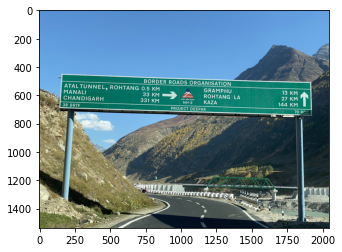

In [28]:
plt.imshow(image1)

In [29]:
imageWithTextRemoved=inpaint('img2.jpg',pipeline)

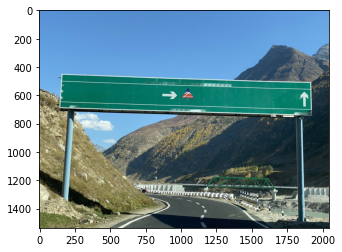

In [30]:
plt.imshow(imageWithTextRemoved)